Import Libraries

In [146]:
!pip install seaborn
!pip install statsmodels

In [147]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize

Import Data

In [148]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles")
data = pd.read_csv(path + '/CO2 Emissions_Canada.csv')

Assign Data to dataframe

In [149]:
df = pd.DataFrame(data)

Check for missing values and improper data.

In [150]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [152]:
df.head(15)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [153]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [154]:
df[['CO2 Emissions(g/km)', 'Fuel Consumption Comb (mpg)', 'Cylinders', 'Engine Size(L)']] = df[['CO2 Emissions(g/km)', 'Fuel Consumption Comb (mpg)', 'Cylinders', 'Engine Size(L)']].astype(float)
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
dtype: object

In [155]:
print(df['Make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [156]:
# Too many to count for incorrect spelling
print(df['Model'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [157]:
print(df['Transmission'].unique())

['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


In [158]:
print(df['Vehicle Class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [159]:
print(df['Fuel Type'].unique())

['Z' 'D' 'X' 'E' 'N']


# Data Driven Transformations

In [160]:
train_df, test_df = train_test_split(df, test_size=.20, random_state=42)

# Below two lines of code are just so methods for my pandas objects will be recognized by my IDE. IE so my methods show a certain color............. (OCD)
train_df = pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)

In [161]:
train_df[train_df.duplicated(keep=False)]
test_df[test_df.duplicated(keep=False)]
# duplicated values show variations in data. not sure why it is returning these values

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4918,INFINITI,Q50 AWD,MID-SIZE,3.0,6.0,AS7,Z,12.4,8.7,10.8,26.0,253.0
6558,AUDI,TTS Coupe,SUBCOMPACT,2.0,4.0,AM7,Z,10.4,8.2,9.4,30.0,220.0
6571,BMW,430i xDrive Cabriolet,SUBCOMPACT,2.0,4.0,AS8,Z,10.6,7.3,9.1,31.0,213.0
4597,CHEVROLET,SILVERADO 4WD FFV,PICKUP TRUCK - STANDARD,4.3,6.0,A6,X,14.1,10.6,12.5,23.0,294.0
2266,BENTLEY,FLYING SPUR,MID-SIZE,4.0,8.0,AS8,Z,17.7,10.0,14.2,20.0,334.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7176,MERCEDES-BENZ,AMG GLC 63 S 4MATIC+,SUV - SMALL,4.0,8.0,A9,Z,15.0,10.9,13.2,21.0,309.0
7070,LAND ROVER,Range Rover TD6 Diesel,SUV - STANDARD,3.0,6.0,AS8,D,10.7,8.3,9.6,29.0,256.0
5395,TOYOTA,RAV4 LE/XLE,SUV - SMALL,2.5,4.0,AS6,X,10.0,7.8,9.0,31.0,210.0
7064,LAMBORGHINI,Urus,SUV - STANDARD,4.0,8.0,AS8,Z,19.2,14.1,16.9,17.0,384.0


Duplicates show slight variations between records. We will keep them.

In [162]:
# Checking for Dimensionality
print('Train')
print(f'Number of unique values in class: {train_df['Vehicle Class'].nunique()}')
print(f'Unique values: {train_df['Vehicle Class'].unique()}')

print('\nTest')
print(f'Number of unique values in class: {test_df['Vehicle Class'].nunique()}')
print(f'Unique values: {test_df['Vehicle Class'].unique()}')

Train
Number of unique values in class: 16
Unique values: ['SUBCOMPACT' 'PICKUP TRUCK - SMALL' 'COMPACT' 'TWO-SEATER'
 'STATION WAGON - MID-SIZE' 'FULL-SIZE' 'SUV - SMALL' 'SUV - STANDARD'
 'MID-SIZE' 'MINICOMPACT' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - SMALL' 'VAN - CARGO'
 'VAN - PASSENGER']

Test
Number of unique values in class: 16
Unique values: ['FULL-SIZE' 'SUBCOMPACT' 'PICKUP TRUCK - STANDARD' 'SUV - STANDARD'
 'TWO-SEATER' 'COMPACT' 'SUV - SMALL' 'PICKUP TRUCK - SMALL' 'MID-SIZE'
 'MINICOMPACT' 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - SMALL'
 'STATION WAGON - MID-SIZE' 'VAN - PASSENGER' 'MINIVAN' 'VAN - CARGO']


Nothing out of the ordinary for Vehicle class so far. Lets check the distribution of Vehicle class.

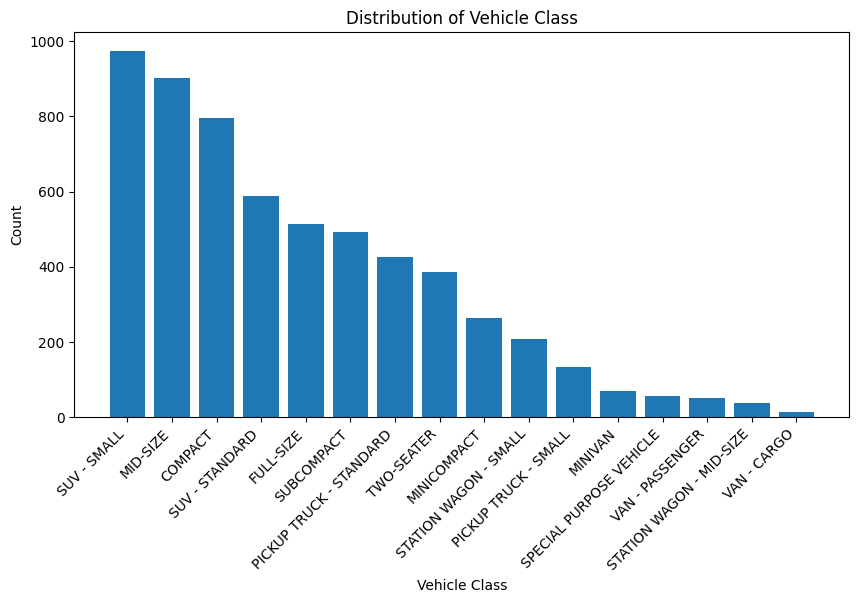

In [163]:
value_counts = train_df['Vehicle Class'].value_counts()
# Showing distribution for Vehicle Class
plt.figure(figsize=(10,5))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.show()

Compact vehicle class makes up most of the dataset for vehicle class, but this should not be a problem for our Decision Tree or Random Forest Models. If it is a problem in out Multinomial Logit Regreesion Model then the less values will likely be grouped into bins.

Other than that Vehicle class is looking pretty clean. Lets move on to Model.

In [164]:
df['Model'].nunique()

2053

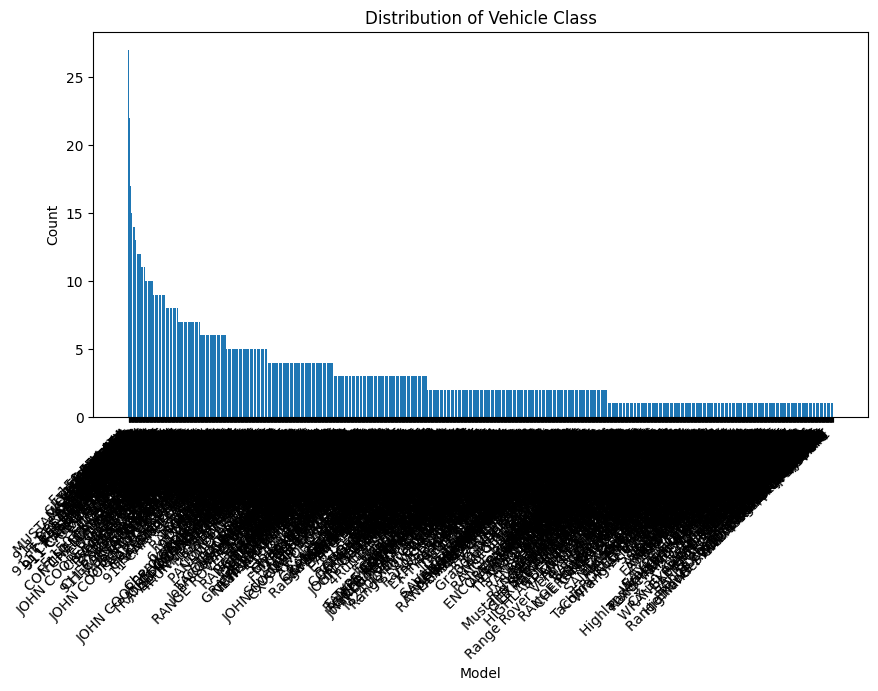

In [165]:
value_counts = train_df['Model'].value_counts()
# Showing distribution for Vehicle Class
plt.figure(figsize=(10,5))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.show()

Model has many unique variables i.e. high dimemnsionality, which can lead to overfitting. Lets address this using by changing values seen less than 3 times to "other".

In [166]:
train_unique_models = train_df['Model'].value_counts()

# What we do to our training data set we must do to our test data set
test_unique_models = test_df['Model'].value_counts()
train_unique_models

Model
F-150 FFV 4X4                         27
F-150 FFV                             22
MUSTANG                               22
FOCUS FFV                             19
SONIC                                 17
                                      ..
Civic Coupe Si                         1
Highlander AWD (Start/Stop System)     1
Mulsanne                               1
Grand Cherokee 4X4 SRT                 1
TTS COUPE                              1
Name: count, Length: 1921, dtype: int64

In [167]:
avg_model_count = train_unique_models.mean().round()
avg_model_count_te = test_unique_models.mean().round()
print(f'Average amount of times a model is seen in the train dataset: {avg_model_count}')
print(f'Average amount of times a model is seen in the test dataset: {avg_model_count_te}')

Average amount of times a model is seen in the train dataset: 3.0
Average amount of times a model is seen in the test dataset: 2.0


In [168]:
print(f'Number of unique values that show no more than {avg_model_count} times within our train dataset: {train_unique_models[train_unique_models < avg_model_count].count()}')
print(f'Number of unique values that show no more than {avg_model_count_te} times within our test dataset: {test_unique_models[test_unique_models < avg_model_count_te].count()}')

Number of unique values that show no more than 3.0 times within our train dataset: 1106
Number of unique values that show no more than 2.0 times within our test dataset: 658


In [169]:
# Train set variables
# Where you adjust the frequency cutoff for unique values seen in Model
train_low_freq_models_list = train_unique_models[train_unique_models < 10]
train_keep_models_list = train_unique_models[train_unique_models >= 10]
keep_models = train_keep_models_list.index
low_freq_models = train_low_freq_models_list.index

# Test set variables below
test_low_freq_models_list = test_unique_models[test_unique_models < 10]
test_keep_models_list = test_unique_models[test_unique_models >= 10]
keep_models_te = test_keep_models_list.index
low_freq_models_te = test_low_freq_models_list.index

print(f'Number of Model values being changed to \"Other\" in our train dataset: {low_freq_models.nunique()}')
print(f'Number of Model that are retaining their values in our train dataset: {keep_models.nunique()}\n')

print(f'Number of Model values being changed to \"Other\" in our test dataset: {low_freq_models_te.nunique()}')
print(f'Number of Model that are retaining their values in our test dataset: {keep_models_te.nunique()}')


print(f'\nTotal number of Model values being changed to "Other": {low_freq_models.nunique() + low_freq_models_te.nunique()}')
print(f'Total number of Model values being retained: {keep_models.nunique() + keep_models_te.nunique()}')

Number of Model values being changed to "Other" in our train dataset: 1855
Number of Model that are retaining their values in our train dataset: 66

Number of Model values being changed to "Other" in our test dataset: 973
Number of Model that are retaining their values in our test dataset: 1

Total number of Model values being changed to "Other": 2828
Total number of Model values being retained: 67


Lets change models seen less than
 3 times (average amount for a seen vehicle within the dataset) to the value other. 

In [170]:
models = train_df['Model']
train_df2 = train_df.copy()

for model in models:
    if model in low_freq_models:
        train_df2['Model'] = train_df2['Model'].replace(model, 'Other')


print(f'Amount of unique values before: {train_df['Model'].nunique()} and after {train_df2['Model'].nunique()}')
train_df2[train_df2['Model'] == 'Other']

Amount of unique values before: 1921 and after 67


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6590,BMW,Other,SUBCOMPACT,3.0,6.0,AS8,Z,11.4,8.1,9.9,29.0,231.0
6274,NISSAN,Other,PICKUP TRUCK - SMALL,4.0,6.0,A5,X,14.7,10.3,12.7,22.0,299.0
2251,AUDI,Other,COMPACT,3.0,6.0,M6,Z,13.8,9.0,11.7,24.0,273.0
3149,PORSCHE,Other,TWO-SEATER,3.4,6.0,AM7,Z,11.3,7.9,9.8,29.0,230.0
4362,VOLVO,Other,STATION WAGON - MID-SIZE,2.0,4.0,AS8,Z,10.1,7.0,8.7,32.0,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5191,MINI,Other,SUBCOMPACT,2.0,4.0,M6,Z,10.3,7.4,9.0,31.0,210.0
5226,NISSAN,Other,MID-SIZE,3.5,6.0,AV7,X,10.6,7.3,9.1,31.0,214.0
5390,TOYOTA,Other,SUV - STANDARD,3.5,6.0,AS8,X,11.7,8.8,10.4,27.0,242.0
860,NISSAN,Other,SUV - SMALL,2.5,4.0,AV,X,9.5,7.4,8.6,33.0,198.0


In [171]:
models_te = test_df['Model']
test_df2 = test_df.copy()

for model in models_te:
    if model in low_freq_models:
        test_df2['Model'] = test_df2['Model'].replace(model, 'Other')


print(f'Amount of unique values before: {test_df['Model'].nunique()} and after {test_df2['Model'].nunique()}')
test_df2[test_df2['Model'] == 'Other']

Amount of unique values before: 974 and after 186


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7261,PORSCHE,Other,FULL-SIZE,3.0,6.0,AM8,Z,12.4,9.0,10.9,26.0,253.0
4489,BMW,Other,SUBCOMPACT,4.4,8.0,AM7,Z,17.3,11.6,14.7,19.0,344.0
6418,TOYOTA,Other,SUV - STANDARD,4.0,6.0,AS5,X,14.3,11.9,13.2,21.0,308.0
3703,FORD,Other,TWO-SEATER,3.5,6.0,AM7,Z,20.6,13.2,17.3,16.0,406.0
5976,JAGUAR,Other,TWO-SEATER,3.0,6.0,AS8,Z,11.9,8.5,10.4,27.0,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3733,GENESIS,Other,FULL-SIZE,3.3,6.0,AS8,Z,13.7,9.7,11.9,24.0,279.0
7185,MERCEDES-BENZ,Other,SUBCOMPACT,2.0,4.0,A9,Z,10.9,7.7,9.5,30.0,221.0
1740,KIA,Other,SUV - SMALL,2.0,4.0,AS6,X,12.6,9.7,11.3,25.0,260.0
1844,MERCEDES-BENZ,Other,MID-SIZE,3.5,6.0,AS7,Z,11.9,8.2,10.2,28.0,235.0


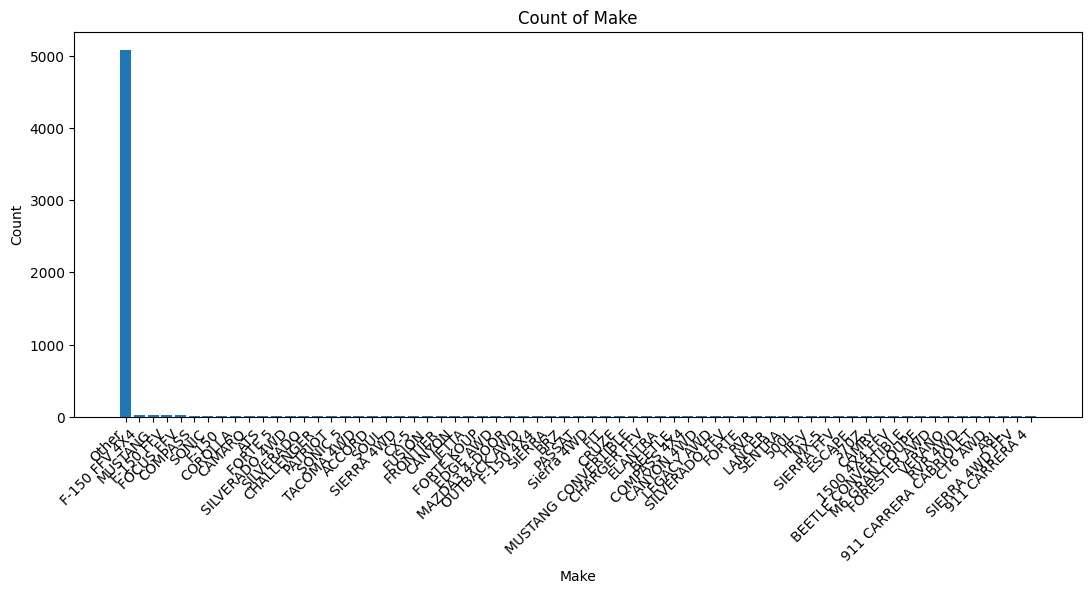

np.int64(67)

In [172]:
value_counts = train_df2['Model'].value_counts()
# Showing distribution for Make
plt.figure(figsize=(13,5))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Make')
plt.show()

value_counts.count()

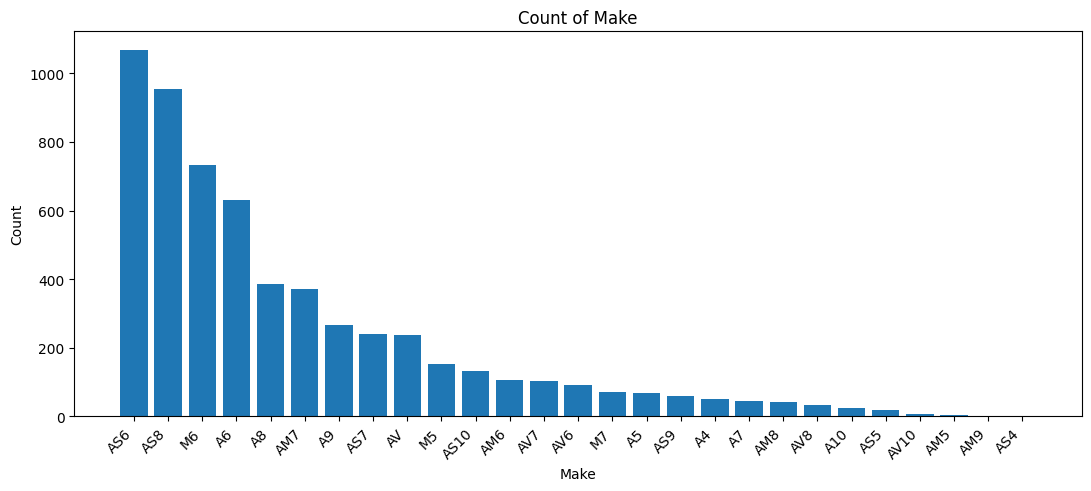

np.int64(27)

In [173]:
value_counts = train_df2['Transmission'].value_counts()
# Showing distribution for Make
plt.figure(figsize=(13,5))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Make')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Make')
plt.show()

value_counts.count()

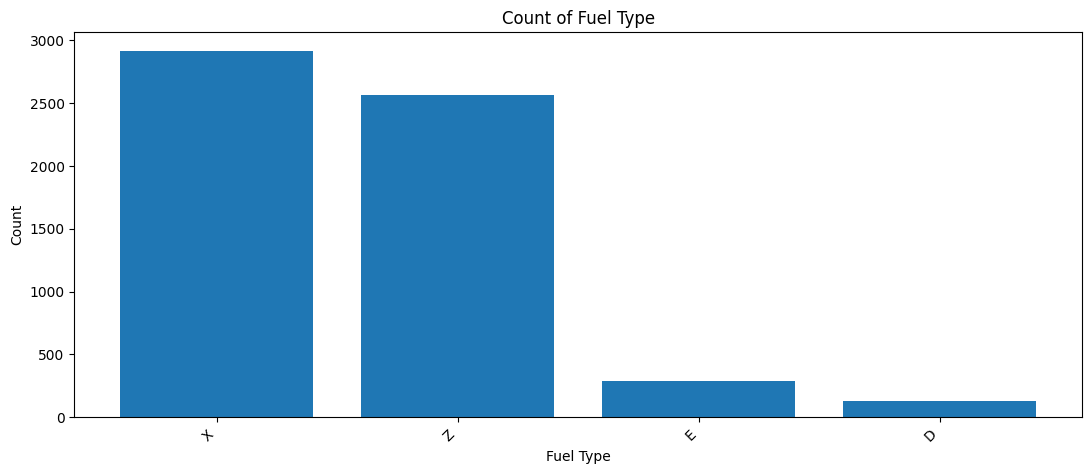

np.int64(4)

In [174]:
value_counts = train_df2['Fuel Type'].value_counts()
# Showing distribution for Make
plt.figure(figsize=(13,5))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Fuel Type')
plt.show()

value_counts.count()

In [175]:
grouped_make = train_df2.groupby(train_df2['Make'])['CO2 Emissions(g/km)'].agg(['mean', 'median', 'count'])


print(grouped_make.sort_values(by=['mean', 'count'], ascending=[True, True]))


                     mean  median  count
Make                                    
SMART          151.428571   150.0      7
HONDA          188.502924   177.0    171
FIAT           193.920635   191.0     63
MAZDA          194.848276   189.0    145
MINI           197.236842   197.0    152
SCION          201.000000   207.0     19
MITSUBISHI     204.354430   207.0     79
HYUNDAI        207.993789   202.0    161
VOLKSWAGEN     208.905063   201.5    158
KIA            214.804598   207.5    174
SUBARU         216.634783   212.0    115
ACURA          222.870370   227.0     54
ALFA ROMEO     225.862069   217.0     29
TOYOTA         226.855513   220.0    263
VOLVO          232.070707   232.0     99
BUICK          233.644444   230.0     90
NISSAN         234.904306   218.0    209
LEXUS          236.371429   244.0    140
JEEP           247.595855   235.0    193
CHRYSLER       249.178082   246.0     73
AUDI           250.914894   241.0    235
BMW            256.323671   246.0    414
INFINITI       2

## Fuel Type

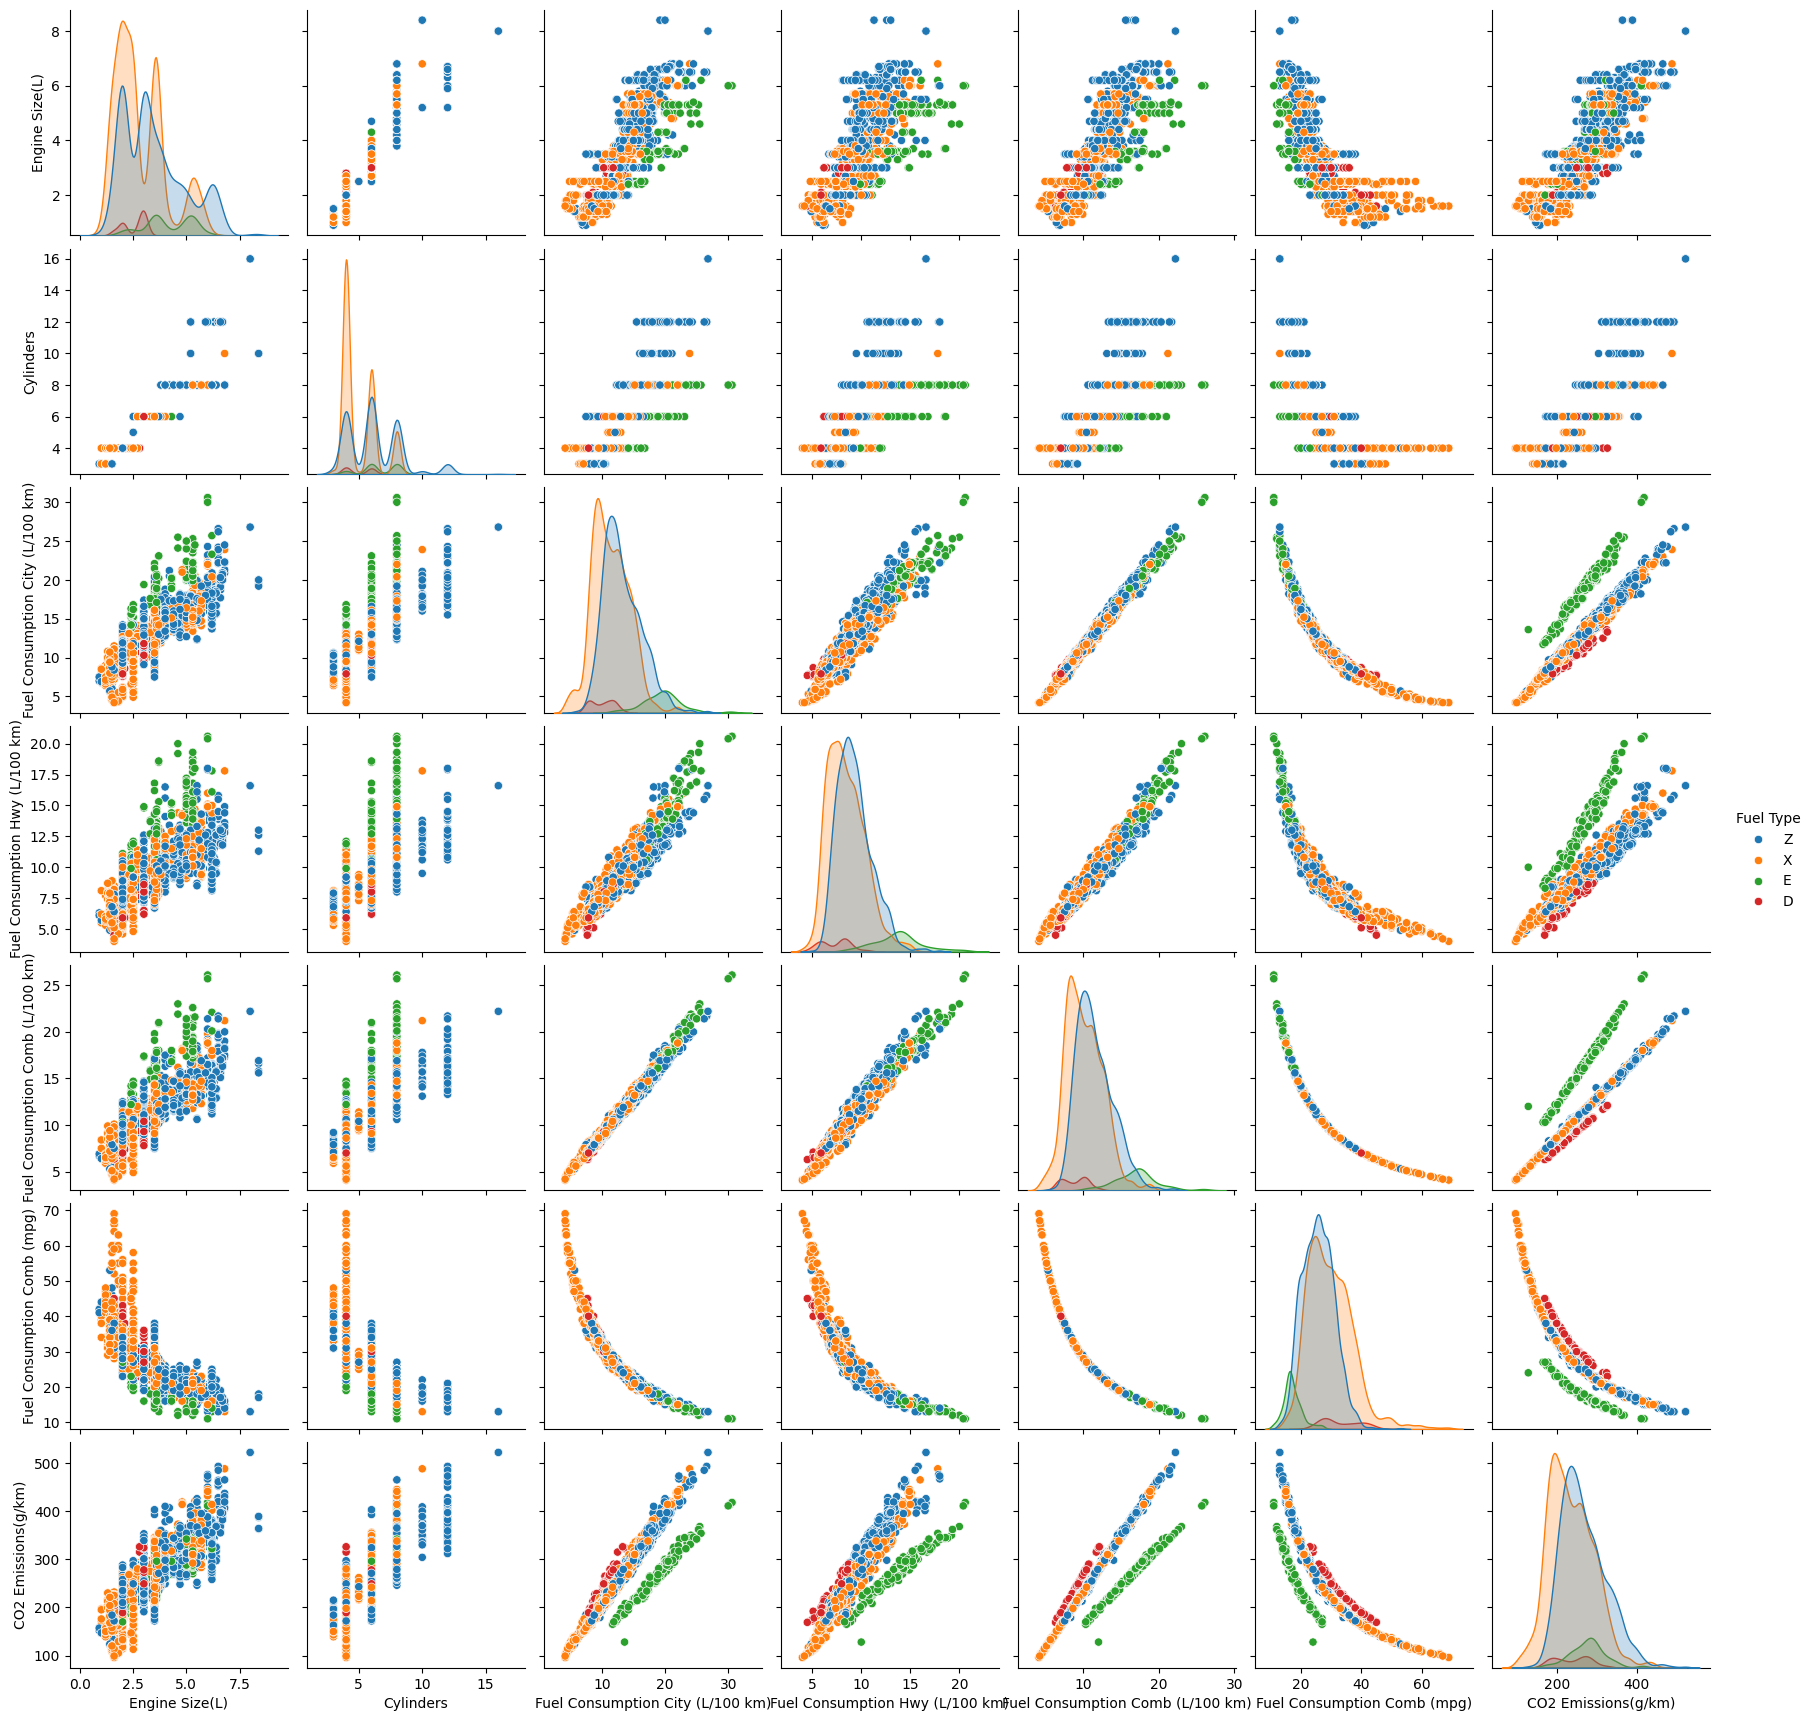

In [176]:
sns.pairplot(train_df2, hue='Fuel Type')
plt.show()

## Fuel Type and Transmission

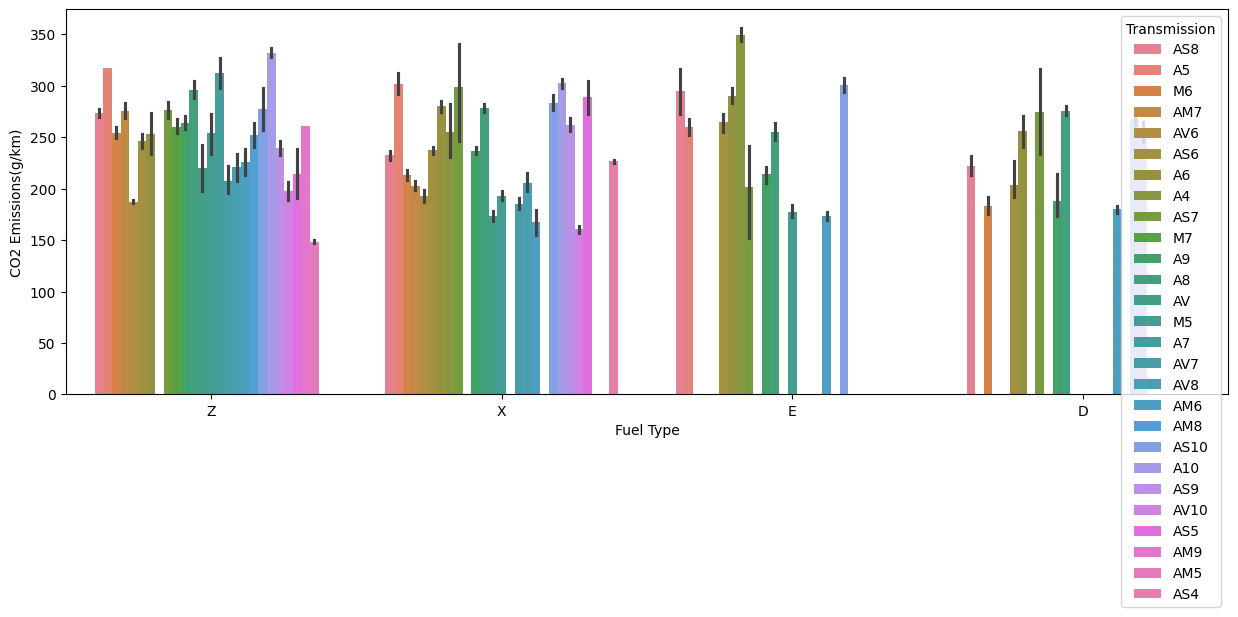

In [177]:
plt.figure(figsize=(15,5))
sns.barplot(data=train_df2, x='Fuel Type', y='CO2 Emissions(g/km)', hue='Transmission')

plt.show()

The above illustration prompts us to look at the data dictionary. We find that the numbers are the specific gear count, and the letters pertain to the transmission type. Separating these into a separate gear count column can provide more insight into co2 emmissions. (Another benefit of the IBM Data Science Methodology is that not only is it comprehensive E2E, but highly iterative, allowing Data Scientists to make improvements as new information is gained.)

## Feature Engineering

In [178]:
# What is done to the training set, is done to the test set. *we say in unison* 
train_df3 = train_df2.copy()
test_df3 = test_df2.copy()


In [179]:
train_df3.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [180]:
# Split Transmission on the number
train_df3[['Transmission', 'Gears']] = train_df3['Transmission'].str.extract(r'([A-Za-z]+)(\d+)')

In [181]:
train_df3.isnull().sum()

Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                        238
Fuel Type                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
Gears                               238
dtype: int64

Our transformation introduces null variables. Lets see if we can fix this.

In [182]:
train_df3[train_df3.isnull().any(axis=1)]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
7240,NISSAN,Other,SUV - SMALL,3.5,6.0,NaN,X,12.4,9.2,11.0,26.0,257.0,NaN
2886,LEXUS,Other,COMPACT,1.8,4.0,NaN,X,5.5,5.9,5.7,50.0,132.0,NaN
5384,TOYOTA,Other,MID-SIZE,1.8,4.0,NaN,X,8.0,6.3,7.2,39.0,168.0,NaN
4879,HONDA,HR-V,STATION WAGON - SMALL,1.8,4.0,NaN,X,8.3,6.9,7.7,37.0,180.0,NaN
577,JEEP,COMPASS,SUV - SMALL,2.0,4.0,NaN,X,10.7,8.8,9.9,29.0,228.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,TOYOTA,Other,COMPACT,1.5,4.0,NaN,X,4.9,5.5,5.1,55.0,120.0,NaN
3890,JEEP,COMPASS,SUV - SMALL,2.0,4.0,NaN,X,10.8,9.0,10.0,28.0,235.0,NaN
975,TOYOTA,Other,MID-SIZE,2.5,4.0,NaN,X,5.5,5.9,5.7,50.0,131.0,NaN
3092,NISSAN,Other,SUV - SMALL,2.5,4.0,NaN,X,9.5,7.4,8.6,33.0,201.0,NaN


Lets take the row number and examine the record before the change to see what is missing.

In [183]:
train_df3 = train_df2.copy()
test_df3 = test_df2.copy()

train_df3.loc[7240, :]

Make                                     NISSAN
Model                                     Other
Vehicle Class                       SUV - SMALL
Engine Size(L)                              3.5
Cylinders                                   6.0
Transmission                                 AV
Fuel Type                                     X
Fuel Consumption City (L/100 km)           12.4
Fuel Consumption Hwy (L/100 km)             9.2
Fuel Consumption Comb (L/100 km)           11.0
Fuel Consumption Comb (mpg)                26.0
CO2 Emissions(g/km)                       257.0
Name: 7240, dtype: object

In [184]:
train_df3[train_df3['Transmission'] == 'AV'].count()

Make                                238
Model                               238
Vehicle Class                       238
Engine Size(L)                      238
Cylinders                           238
Transmission                        238
Fuel Type                           238
Fuel Consumption City (L/100 km)    238
Fuel Consumption Hwy (L/100 km)     238
Fuel Consumption Comb (L/100 km)    238
Fuel Consumption Comb (mpg)         238
CO2 Emissions(g/km)                 238
dtype: int64

Our problem lies within our regular expression logic, as it is not recognizing 'AV'.

In [185]:
train_df3[['Transmission', 'Gears']] = train_df3['Transmission'].str.extract(r'([A-Za-z]+)([\d]*)')

test_df3[['Transmission', 'Gears']] = test_df3['Transmission'].str.extract(r'([A-Za-z]+)([\d]*)')
train_df3.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Gears                               0
dtype: int64

In [188]:
train_df3['Gears'] = train_df3['Gears'].replace('', '0')
test_df3['Gears'] = test_df3['Gears'].replace('', '0')
train_df3['Gears'] = train_df3['Gears'].astype(float)
test_df3['Gears'] = test_df3['Gears'].astype(float)
train_df3.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
Gears                               float64
dtype: object

In [189]:
test_df3

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
7261,PORSCHE,Other,FULL-SIZE,3.0,6.0,AM,Z,12.4,9.0,10.9,26.0,253.0,8.0
4489,BMW,Other,SUBCOMPACT,4.4,8.0,AM,Z,17.3,11.6,14.7,19.0,344.0,7.0
1539,GMC,SIERRA,PICKUP TRUCK - STANDARD,6.2,8.0,A,Z,16.1,11.4,14.0,20.0,322.0,8.0
3532,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,5.3,8.0,A,X,14.6,10.3,12.7,22.0,297.0,6.0
6418,TOYOTA,Other,SUV - STANDARD,4.0,6.0,AS,X,14.3,11.9,13.2,21.0,308.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,MERCEDES-BENZ,Other,SUBCOMPACT,2.0,4.0,A,Z,10.9,7.7,9.5,30.0,221.0,9.0
1740,KIA,Other,SUV - SMALL,2.0,4.0,AS,X,12.6,9.7,11.3,25.0,260.0,6.0
4609,CHEVROLET,SONIC 5,STATION WAGON - SMALL,1.4,4.0,AS,X,8.8,6.6,7.8,36.0,184.0,6.0
1844,MERCEDES-BENZ,Other,MID-SIZE,3.5,6.0,AS,Z,11.9,8.2,10.2,28.0,235.0,7.0


In [190]:
print(f'Train Null values: \n{train_df3[['Transmission', 'Gears']].isnull().sum()}\n')
print(f'Test Null values: \n{test_df3[['Transmission', 'Gears']].isnull().sum()}\n')

print(f'Train df: \n{train_df3[['Transmission', 'Gears']]}\n')
print(f'Test df: \n{test_df3[['Transmission', 'Gears']]}\n')

Train Null values: 
Transmission    0
Gears           0
dtype: int64

Test Null values: 
Transmission    0
Gears           0
dtype: int64

Train df: 
     Transmission  Gears
6590           AS    8.0
6274            A    5.0
2251            M    6.0
3149           AM    7.0
4362           AS    8.0
...           ...    ...
5191            M    6.0
5226           AV    7.0
5390           AS    8.0
860            AV    0.0
7270           AM    8.0

[5908 rows x 2 columns]

Test df: 
     Transmission  Gears
7261           AM    8.0
4489           AM    7.0
1539            A    8.0
3532            A    6.0
6418           AS    5.0
...           ...    ...
7185            A    9.0
1740           AS    6.0
4609           AS    6.0
1844           AS    7.0
5154           AM    7.0

[1477 rows x 2 columns]



Now lets visualize transmission and fuel type.

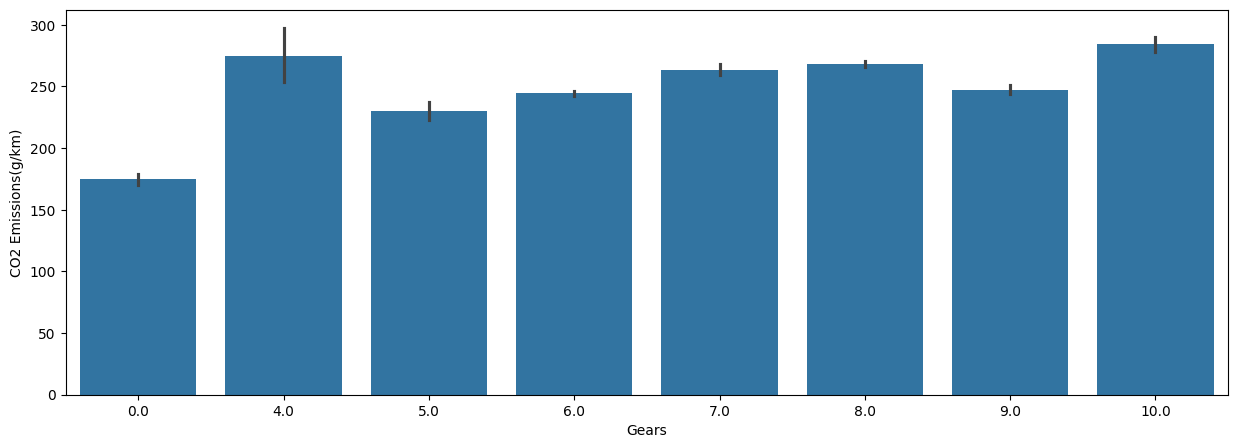

In [191]:
plt.figure(figsize=(15,5))
sns.barplot(data=train_df3, x='Gears', y='CO2 Emissions(g/km)')

plt.show()

In [192]:
train_df3['Gears'].unique()

array([ 8.,  5.,  6.,  7.,  4.,  9.,  0., 10.])

In [195]:
train_df3[train_df3['Gears'] == 0]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
7240,NISSAN,Other,SUV - SMALL,3.5,6.0,AV,X,12.4,9.2,11.0,26.0,257.0,0.0
2886,LEXUS,Other,COMPACT,1.8,4.0,AV,X,5.5,5.9,5.7,50.0,132.0,0.0
5384,TOYOTA,Other,MID-SIZE,1.8,4.0,AV,X,8.0,6.3,7.2,39.0,168.0,0.0
4879,HONDA,HR-V,STATION WAGON - SMALL,1.8,4.0,AV,X,8.3,6.9,7.7,37.0,180.0,0.0
577,JEEP,COMPASS,SUV - SMALL,2.0,4.0,AV,X,10.7,8.8,9.9,29.0,228.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,TOYOTA,Other,COMPACT,1.5,4.0,AV,X,4.9,5.5,5.1,55.0,120.0,0.0
3890,JEEP,COMPASS,SUV - SMALL,2.0,4.0,AV,X,10.8,9.0,10.0,28.0,235.0,0.0
975,TOYOTA,Other,MID-SIZE,2.5,4.0,AV,X,5.5,5.9,5.7,50.0,131.0,0.0
3092,NISSAN,Other,SUV - SMALL,2.5,4.0,AV,X,9.5,7.4,8.6,33.0,201.0,0.0


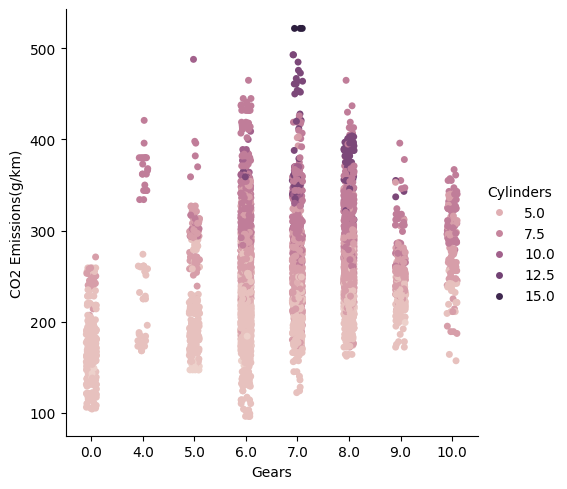

In [196]:

sns.catplot(train_df3, x='Gears', y='CO2 Emissions(g/km)', hue='Cylinders')
plt.show()

In [197]:
train_df3.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                           float64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
Gears                               float64
dtype: object

In [198]:
train_df3[train_df3['Gears'] == 0].describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.0
mean,2.061345,4.155462,8.075630,6.756303,7.486134,39.693277,174.533613,0.0
std,0.579846,0.613656,2.109031,1.314421,1.711840,9.029864,39.648414,0.0
min,1.200000,3.000000,4.300000,4.600000,4.500000,24.000000,104.000000,0.0
25%,1.800000,4.000000,6.600000,5.900000,6.325000,34.000000,145.500000,0.0
50%,2.000000,4.000000,8.000000,6.300000,7.200000,39.000000,168.000000,0.0
75%,2.400000,4.000000,9.100000,7.400000,8.375000,44.750000,195.500000,0.0
max,3.500000,6.000000,13.200000,10.300000,11.800000,63.000000,271.000000,0.0


Now that we know the bulk of our missing items came from vehicles with four cylinders on average, we can begin to find the average value to impute or missing values.

In [199]:
train_df3[train_df3['Cylinders'] == 4].describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
count,2573.000000,2573.0,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000,2573.000000
mean,2.003381,4.0,9.908317,7.502798,8.825379,32.908278,205.154295,5.997668
std,0.343151,0.0,1.712006,1.167863,1.424166,6.096373,31.568766,2.078924
min,1.000000,4.0,4.200000,4.000000,4.100000,19.000000,96.000000,0.000000
25%,1.800000,4.0,8.900000,6.700000,8.000000,29.000000,186.000000,6.000000
50%,2.000000,4.0,10.000000,7.400000,8.800000,32.000000,205.000000,6.000000
75%,2.300000,4.0,11.000000,8.200000,9.700000,35.000000,225.000000,7.000000
max,2.800000,4.0,16.800000,12.100000,14.700000,69.000000,326.000000,10.000000


In this case it will be 6, since that is the average amount of gears seen within vehicles that have four cylinders.

In [202]:
train_df3['Gears'] = train_df3['Gears'].replace(0, 6)
test_df3['Gears'] = test_df3['Gears'].replace(0, 6)

train_df3.loc[7240,]

Make                                     NISSAN
Model                                     Other
Vehicle Class                       SUV - SMALL
Engine Size(L)                              3.5
Cylinders                                   6.0
Transmission                                 AV
Fuel Type                                     X
Fuel Consumption City (L/100 km)           12.4
Fuel Consumption Hwy (L/100 km)             9.2
Fuel Consumption Comb (L/100 km)           11.0
Fuel Consumption Comb (mpg)                26.0
CO2 Emissions(g/km)                       257.0
Gears                                       6.0
Name: 7240, dtype: object

We have successfully created a new feature, and imputed its missing values with that of the average of the most vehicles of the same type that were missing. IE most missing values were of cars that had on average 4 cylinders. So we looked and saw that the average amount of gears for these vehicle were six.